In [1]:
import sys, os
import numpy             as np
import scipy             as sp
import scipy.optimize    as opt
import matplotlib.pyplot as plt

path_PythonCodeSet = "/Users/miiya/python_code-set"
sys.path.append(path_PythonCodeSet)

import common.io_data_bin
import common.statistics
import fitting.fitfunc_type
import fitting.io_params

In [2]:
ibase = "/Users/miiya/Dropbox/programs/data/data_test.python"
obase = "/Users/miiya/Dropbox/programs/data/data_test.python"

ifname = "Pot.LcN12__LcN12_.Veff3S1.t11.bin_size57.bin"
ofname = "Pot.LcN12__LcN12_.Veff3S1.t11.bin_size57.fitparam"

r_min = 0.001
r_max = 2.0

y_tmp, x_tmp, e_tmp = common.io_data_bin.input_bin_data(ibase+"/"+ifname)

Nc     = len(y_tmp[:,0])
Nd_tmp = len(y_tmp[0,:])

Nd = 0
y = np.empty((Nc,0))
x = np.empty(0)
e = np.empty(0)
for ir in range(Nd_tmp):
    if (r_min <= x_tmp[ir] <= r_max):
        y = np.append(y, y_tmp[:,ir].reshape((Nc,1)), axis=1)
        x = np.append(x, x_tmp[  ir])
        e = np.append(e, e_tmp[  ir])
        Nd += 1
del y_tmp
del x_tmp
del e_tmp

# Successful to input Binary data
# N.conf = 7
# N.data = 969


In [3]:
ffunc_str = "3G"
p_in = np.array([8.1154e+02, 1.1941e-01, 3.1105e+02, 2.8664e-01, -4.9985e+01, 7.2021e-01])

Nres  = 6
Max_i = 100000

Np    = len(p_in)
ffunc = fitting.fitfunc_type.set_fitfunc_from_fname(ffunc_str)

for ires in range(Nres):
    p_out = np.array([opt.curve_fit(ffunc, x, y[ic,:], sigma=e, p0=p_in, maxfev=Max_i)[0] 
                      for ic in range(Nc)])
    chisq = np.array([np.sum(((ffunc(x, *p_out[ic,:]) - y[ic,:]) / e)**2) / (Nd - Np) for ic in range(Nc)])
    
    print("# === Fitting Results (%03d) ===" % (ires+1))
    print("# Chisq/dof = %lf +/- %lf" % (*common.statistics.make_mean_err(chisq),))
    p_in = np.array([common.statistics.make_mean_err(p_out[:,ip])[0] for ip in range(Np)])
    print("# Parameters:", "%e, "*len(p_in) % (*p_in,))

# === Fitting Results (001) ===
# Chisq/dof = 0.955172 +/- 0.486424
# Parameters: 8.053137e+02, 1.175485e-01, 3.208757e+02, 2.779379e-01, -4.610010e+01, 7.601452e-01, 
# === Fitting Results (002) ===
# Chisq/dof = 0.955172 +/- 0.486424
# Parameters: 8.053136e+02, 1.175481e-01, 3.208774e+02, 2.779372e-01, -4.609991e+01, 7.601459e-01, 
# === Fitting Results (003) ===
# Chisq/dof = 0.955172 +/- 0.486424
# Parameters: 8.053136e+02, 1.175481e-01, 3.208774e+02, 2.779372e-01, -4.609991e+01, 7.601459e-01, 
# === Fitting Results (004) ===
# Chisq/dof = 0.955172 +/- 0.486424
# Parameters: 8.053136e+02, 1.175481e-01, 3.208774e+02, 2.779372e-01, -4.609991e+01, 7.601459e-01, 
# === Fitting Results (005) ===
# Chisq/dof = 0.955172 +/- 0.486424
# Parameters: 8.053136e+02, 1.175481e-01, 3.208774e+02, 2.779372e-01, -4.609991e+01, 7.601459e-01, 
# === Fitting Results (006) ===
# Chisq/dof = 0.955172 +/- 0.486424
# Parameters: 8.053136e+02, 1.175481e-01, 3.208774e+02, 2.779372e-01, -4.609991e+01, 7.60145

In [4]:
print("#\n# === Fitting Results (Fin) ===")
mean, err = common.statistics.make_mean_err(chisq)
print("# Chisq/dof = %15lf +/- %15lf (%15.6f %%)" % (mean, err, abs(err/mean) * 100))
p_tmp = np.array([common.statistics.make_mean_err(p_out[:,ip]) for ip in range(Np)])
for ip in range(Np):
    print("# param[%2d] = %15e +/- %15e (%15.6f %%)" % (ip, p_tmp[ip,0], p_tmp[ip,1],
                                                        abs(p_tmp[ip,1] /p_tmp[ip,0]) * 100))

#
# === Fitting Results (Fin) ===
# Chisq/dof =        0.955172 +/-        0.486424 (      50.925251 %)
# param[ 0] =    8.053136e+02 +/-    8.272749e+00 (       1.027270 %)
# param[ 1] =    1.175481e-01 +/-    2.598606e-03 (       2.210674 %)
# param[ 2] =    3.208774e+02 +/-    1.432230e+01 (       4.463479 %)
# param[ 3] =    2.779372e-01 +/-    1.125921e-02 (       4.050991 %)
# param[ 4] =   -4.609991e+01 +/-    6.229058e+00 (      13.512083 %)
# param[ 5] =    7.601459e-01 +/-    6.983165e-02 (       9.186611 %)


(0.001, 2.0)

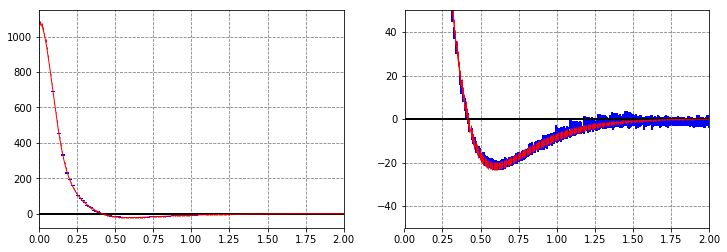

In [5]:
r      = np.linspace(0, 2.5, 300)
f_ave  = np.array([np.mean(np.array([ffunc(r[ir], *p_out[ic,:]) for ic in range(Nc)])) for ir in range(len(r))])
f_err  = np.array([np.std (np.array([ffunc(r[ir], *p_out[ic,:]) for ic in range(Nc)])) for ir in range(len(r))])
f_err *= np.sqrt(Nc-1)

fig, (axL, axR) = plt.subplots(ncols=2, figsize=(12,4), sharex=True)
axL.errorbar(x, np.mean(y, axis=0), yerr=e, fmt='none', ecolor='blue', lw=4)
axR.errorbar(x, np.mean(y, axis=0), yerr=e, fmt='none', ecolor='blue', lw=2)
axL.errorbar(r, f_ave, yerr=f_err, fmt='r-', ecolor='red', lw=1)
axR.errorbar(r, f_ave, yerr=f_err, fmt='r-', ecolor='red', lw=1)

axL.grid(which='major',color='gray',linestyle='--')
axR.grid(which='major',color='gray',linestyle='--')
axL.axhline(0.0, lw=2, color='black')
axR.axhline(0.0, lw=2, color='black')

axR.set_ylim([-50, 50])
axR.set_xlim([r_min, r_max])

In [6]:
#fitting.io_params.output_params(obase+"/"+ofname, ffunc_str, p_out)